In [3]:
import pandas as pd
import numpy as np

In [4]:
pwd

'C:\\Users\\jjc12\\Desktop\\I\\Data Analyst\\Python\\Linear algebra'

In [100]:
df =pd.read_csv('./data/kaggle-survey-2021/kaggle_survey_2021_responses.csv')

C:\BIGDATA\envs\datascience\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,195,201,285,286,287,288,289,290,291,292) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# EDA - 한국 사람들이 프로그래밍할 때 가장 많이 사용하는 언어는?

In [181]:
df_k = df[df['Q3'] == 'South Korea']

In [16]:
df_k

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
276,509,22-24,Man,South Korea,Bachelor’s degree,Other,1-3 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
373,997,50-54,Man,South Korea,Master’s degree,Program/Project Manager,20+ years,Python,NaN,SQL,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
410,670,30-34,Man,South Korea,Bachelor’s degree,Student,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
482,948,35-39,Man,South Korea,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
492,756,45-49,Man,South Korea,Master’s degree,Currently not employed,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25497,339,25-29,Man,South Korea,Master’s degree,Student,3-5 years,Python,NaN,SQL,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25628,142,25-29,Man,South Korea,Bachelor’s degree,Machine Learning Engineer,< 1 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25842,12540,25-29,Man,South Korea,Master’s degree,Data Scientist,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25867,524,45-49,Prefer not to say,South Korea,Doctoral degree,Research Scientist,5-10 years,NaN,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
selected_col = [col for col in df_k.columns if col.startswith('Q7')] # 굉장히 유용한 도구, 포함 단어로 추출하는 코드 startswith
selected_col

['Q7_Part_1',
 'Q7_Part_2',
 'Q7_Part_3',
 'Q7_Part_4',
 'Q7_Part_5',
 'Q7_Part_6',
 'Q7_Part_7',
 'Q7_Part_8',
 'Q7_Part_9',
 'Q7_Part_10',
 'Q7_Part_11',
 'Q7_Part_12',
 'Q7_OTHER']

In [68]:
temp = df_k[selected_col]

## value 내림차순만 뽑아내기

In [73]:
temp.notnull().sum().sort_values(ascending=False)[:5]

Q7_Part_1    303
Q7_Part_2     89
Q7_Part_3     89
Q7_Part_4     81
Q7_Part_5     68
dtype: int64

## Key: Value 뽑아서 dictionary 만들기

In [85]:
tot = {}
for col in selected_col:
    tot[df_k[col].value_counts().index[0]] = df_k[col].value_counts()[0]
    
# list(tot.keys())
list(tot.values())

[303, 89, 89, 81, 68, 57, 42, 2, 6, 14, 38, 3, 15]

In [94]:
import operator
sorted_tot = dict( sorted(tot.items(), key=operator.itemgetter(1), reverse=True)) #dictionary 내림차순하는 코드
sorted_tot

{'Python': 303,
 'R': 89,
 'SQL': 89,
 'C': 81,
 'C++': 68,
 'Java': 57,
 'Javascript': 42,
 'MATLAB': 38,
 'Other': 15,
 'Bash': 14,
 'Swift': 6,
 'None': 3,
 'Julia': 2}

## barplot으로 많이 쓰는 언어 순으로 시각화하기

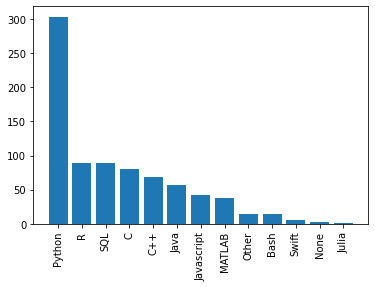

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.bar(list(sorted_tot.keys()), list(sorted_tot.values()))
plt.xticks(rotation=90)
plt.show()

----

# Recommend System
> - **collaborative filtering**
> > 나의 시청기록과 가장 비슷한 유저를 찾고, 그 유저 시청 목록 중 내가 안 본 것을 추천해준다.

In [101]:
df2 = pd.read_csv('./data/insu/train.csv')

In [103]:
df2.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,...,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,2,1,1,3,2,2,1,NaN,3,2,...,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,NaN,5.0,412,2,1,1,3,2,2,1,NaN,3,2,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,NaN,10.0,3,2,2,1,3,2,2,2,NaN,3,2,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.420290,NaN,0.352113,NaN,0.0,350,2,2,1,3,2,2,2,NaN,3,2,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,NaN,3,2,3,2,0.463768,NaN,0.408451,NaN,NaN,162,2,2,1,3,2,2,2,NaN,3,2,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8


In [106]:
df2[sel_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Data columns (total 89 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Medical_History_1   50492 non-null  float64
 1   Medical_History_2   59381 non-null  int64  
 2   Medical_History_3   59381 non-null  int64  
 3   Medical_History_4   59381 non-null  int64  
 4   Medical_History_5   59381 non-null  int64  
 5   Medical_History_6   59381 non-null  int64  
 6   Medical_History_7   59381 non-null  int64  
 7   Medical_History_8   59381 non-null  int64  
 8   Medical_History_9   59381 non-null  int64  
 9   Medical_History_10  557 non-null    float64
 10  Medical_History_11  59381 non-null  int64  
 11  Medical_History_12  59381 non-null  int64  
 12  Medical_History_13  59381 non-null  int64  
 13  Medical_History_14  59381 non-null  int64  
 14  Medical_History_15  14785 non-null  float64
 15  Medical_History_16  59381 non-null  int64  
 16  Medi

In [104]:
sel_col = [col for col in df2.columns if col.startswith('Medical')]
sel_col

['Medical_History_1',
 'Medical_History_2',
 'Medical_History_3',
 'Medical_History_4',
 'Medical_History_5',
 'Medical_History_6',
 'Medical_History_7',
 'Medical_History_8',
 'Medical_History_9',
 'Medical_History_10',
 'Medical_History_11',
 'Medical_History_12',
 'Medical_History_13',
 'Medical_History_14',
 'Medical_History_15',
 'Medical_History_16',
 'Medical_History_17',
 'Medical_History_18',
 'Medical_History_19',
 'Medical_History_20',
 'Medical_History_21',
 'Medical_History_22',
 'Medical_History_23',
 'Medical_History_24',
 'Medical_History_25',
 'Medical_History_26',
 'Medical_History_27',
 'Medical_History_28',
 'Medical_History_29',
 'Medical_History_30',
 'Medical_History_31',
 'Medical_History_32',
 'Medical_History_33',
 'Medical_History_34',
 'Medical_History_35',
 'Medical_History_36',
 'Medical_History_37',
 'Medical_History_38',
 'Medical_History_39',
 'Medical_History_40',
 'Medical_History_41',
 'Medical_Keyword_1',
 'Medical_Keyword_2',
 'Medical_Keyword_3',


## 결측치 비율을 통해, 열 처리하기

In [114]:
drop_cols = df2.columns[df2.isna().mean() > 0.7] # 결측치 비율이 70%가 넘는 열들
drop_cols

Index(['Family_Hist_5', 'Medical_History_10', 'Medical_History_15',
       'Medical_History_24', 'Medical_History_32'],
      dtype='object')

In [116]:
df2.drop(columns = drop_cols, inplace = True)

In [119]:
df2.fillna(df2.mean(), inplace = True) # pandas 는 정말 아름다운 함수인 것이, 각 열마다 평균을 구해서, 그 열의 Na에 알맞은 값을 채워준다.
df2 # 각 column별로 평균값으로 결측치를 채워준다.

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,...,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.000000,3,0.361469,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,0.474550,0.598039,0.444890,4.000000,112,2,1,1,3,2,2,1,3,2,3,3,...,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.000000,2,0.001800,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,0.497737,0.084507,5.000000,412,2,1,1,3,2,2,1,3,2,3,3,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.000000,2,0.030000,1,2,8,3,1,1,1,2,1,1,3,0.001733,3,2,3,3,0.304348,0.497737,0.225352,10.000000,3,2,2,1,3,2,2,2,3,2,3,3,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.000000,3,0.200000,2,2,8,3,1,2,1,2,1,1,3,0.001733,3,2,3,3,0.420290,0.497737,0.352113,0.000000,350,2,2,1,3,2,2,2,3,2,3,3,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.000000,2,0.050000,1,2,6,3,1,2,1,2,1,1,3,0.001733,3,2,3,2,0.463768,0.497737,0.408451,7.962172,162,2,2,1,3,2,2,2,3,2,3,3,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59376,79142,1,D1,10,0.230769,2,3,1,0.074627,0.709091,0.320084,0.519103,0.020,1,3,0.000000,3,0.025000,1,2,8,3,1,2,1,2,1,1,3,0.001733,3,2,3,3,0.217391,0.497737,0.197183,0.000000,261,2,1,1,3,2,2,2,3,2,3,3,...,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
59377,79143,1,D3,26,0.230769,2,3,1,0.432836,0.800000,0.403766,0.551119,0.1

In [120]:
df2.info() # 너무 열이 많아서, 차원이 많아서 이런 거구나!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 123 entries, Id to Response
dtypes: float64(13), int64(109), object(1)
memory usage: 55.7+ MB


In [121]:
df2['Product_Info_2'].value_counts()

D3    14321
D4    10812
A8     6835
D1     6554
D2     6286
E1     2647
A1     2363
A6     2098
A2     1974
A7     1383
B2     1122
A3      977
A5      775
C3      306
C1      285
C4      219
A4      210
C2      160
B1       54
Name: Product_Info_2, dtype: int64

## 범주형 열, 숫자로 변환하기

In [125]:
from sklearn.preprocessing import LabelEncoder # 범주형 변수를 숫자화해주는 편리한 도구, Pandas에도 있기는 있다. 그런데 이게 더 편함.

encoder = LabelEncoder() # 항상 먼저 선언을 해줘야 한다. -> 객체 선언을 한다. 쓰기 전에 쓸 것을 불러오는 것이다.
df2.Product_Info_2 = encoder.fit_transform(df2.Product_Info_2) # 문자열 순서 대로 인덱스 숫자로 넣어주는 도구이다.
df2

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,...,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,16,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.000000,3,0.361469,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,0.474550,0.598039,0.444890,4.000000,112,2,1,1,3,2,2,1,3,2,3,3,...,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,5,1,0,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.000000,2,0.001800,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,0.497737,0.084507,5.000000,412,2,1,1,3,2,2,1,3,2,3,3,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,6,1,18,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.000000,2,0.030000,1,2,8,3,1,1,1,2,1,1,3,0.001733,3,2,3,3,0.304348,0.497737,0.225352,10.000000,3,2,2,1,3,2,2,2,3,2,3,3,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,7,1,17,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.000000,3,0.200000,2,2,8,3,1,2,1,2,1,1,3,0.001733,3,2,3,3,0.420290,0.497737,0.352113,0.000000,350,2,2,1,3,2,2,2,3,2,3,3,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
4,8,1,15,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.000000,2,0.050000,1,2,6,3,1,2,1,2,1,1,3,0.001733,3,2,3,2,0.463768,0.497737,0.408451,7.962172,162,2,2,1,3,2,2,2,3,2,3,3,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59376,79142,1,14,10,0.230769,2,3,1,0.074627,0.709091,0.320084,0.519103,0.020,1,3,0.000000,3,0.025000,1,2,8,3,1,2,1,2,1,1,3,0.001733,3,2,3,3,0.217391,0.497737,0.197183,0.000000,261,2,1,1,3,2,2,2,3,2,3,3,...,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
59377,79143,1,16,26,0.230769,2,3,1,0.432836,0.800000,0.403766,0.551119,0.10

## Target 고객과 가장 유사한 고객 찾기

### 유사도 3개 척도 

    1. L2 Norm : euclidean distance - 축 거리, 크기 뭉갤 때
    2. L1 Norm : manhattan distance - 축 거리, 크기 강조할 때
    3. cosine distance - 크기X, 방향만 고려해서 볼 때

In [127]:
def euclidean_distance(x, y):
    # x, y는 Numpy array- 1. 데이터 타입이 같고, 크기가 같아야한다, 또 선언 후 바꿀 수 없다_연산 속도 이득 2. elementwise_broadcasting
    # 아니면, for문 돌아야한다.
    
    diff = x - y
    sq = np.square(diff)
    _sum = sq.sum() # np.sum(sq)
    distance = np.sqrt(_sum)
    
    return distance

In [130]:
euclidean_distance(np.array([0,0,0]), np.array([1,2,2]))

3.0

In [133]:
def manhattan_distance(x,y):
    
    diff_abs = np.abs(x - y)
    distance = diff_abs.sum()
    return distance

In [134]:
manhattan_distance(np.array([0,0,0]), np.array([1,2,2]))

5

In [145]:
def cosine_distance(x, y):
    # 1) vector l2 norm
    # 2) 내적
    
    dot = x @ y # 내적 계산 연산자
    l2_x = np.sqrt(np.sum(np.square(x))) # L2 norm  # euclidean_distance(x,np.zeros(len(x)))
    l2_y = np.sqrt(np.sum(np.square(y)))            # euclidean_distance(y,np.zeros(len(x)))
    similarity = dot/ (l2_x * l2_y)
    distance = 1 - similarity
    
    return distance.astype(np.float64)

In [149]:
v3 = np.array([1,1,1])
v4 = np.array([2,2,2])
v5 = np.array([-1,-1,-1])

cosine_distance(v3, v4) # ~ 0 # 컴퓨터는 무한까지 계산하지 못하므로, 어느 정도 선에서 잘라준다. 위의 sqrt과정에서 생긴 문제!
cosine_distance(v3, v5) # 2

2.0

In [158]:
df2.iloc[0] #series는 numpy랑 똑같이 작동한다!

Id                     2.000000
Product_Info_1         1.000000
Product_Info_2        16.000000
Product_Info_3        10.000000
Product_Info_4         0.076923
                        ...    
Medical_Keyword_45     0.000000
Medical_Keyword_46     0.000000
Medical_Keyword_47     0.000000
Medical_Keyword_48     0.000000
Response               8.000000
Name: 0, Length: 123, dtype: float64

In [164]:
df2.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,...,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,16,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,0.361469,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,0.474550,0.598039,0.444890,4.000000,112,2,1,1,3,2,2,1,3,2,3,3,...,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,5,1,0,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.001800,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,0.497737,0.084507,5.000000,412,2,1,1,3,2,2,1,3,2,3,3,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,6,1,18,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.030000,1,2,8,3,1,1,1,2,1,1,3,0.001733,3,2,3,3,0.304348,0.497737,0.225352,10.000000,3,2,2,1,3,2,2,2,3,2,3,3,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,7,1,17,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.200000,2,2,8,3,1,2,1,2,1,1,3,0.001733,3,2,3,3,0.420290,0.497737,0.352113,0.000000,350,2,2,1,3,2,2,2,3,2,3,3,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
4,8,1,15,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.050000,1,2,6,3,1,2,1,2,1,1,3,0.001733,3,2,3,2,0.463768,0.497737,0.408451,7.962172,162,2,2,1,3,2,2,2,3,2,3,3,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8


In [171]:
# np.sort([3,4,8,2]) # sort는 작은 값부터 정렬
np.argsort([3,4,8,2]) #argsort는 작은 것부터 나열 했을 때, 인덱스값이 나온다.

array([3, 0, 1, 2], dtype=int64)

### L2를 기준으로 해서, 첫 번째 고객과 가장 유사한 고객 5명 찾기

   - 자기 자신을 포함하지 않는 for 구문 이용 - index + 2

In [160]:
target = df2.iloc[0].values

# 최소값을 구하는 전략
# min_value = 1234564789 # 내 데이터 모든 값들보다는 크게 해야합니다.
# min_idx = 1

# 리스트를 이용해서 유사한 여러명 찾는 전략
distance = []

for i in range(1, len(df2)):
    l2 = euclidean_distance(target, df2.iloc[i].values) #첫번째 고객과 i번째 고객 사이의 거리
    distance.append(l2)
#     if l2 < min_value:
#         min_value = l2
#         min_idx = i + 1 # 1을 더하는 이유는, 자기 자신을 포함하지 않았기 때문에!

min_idx = np.argsort(distances)[:5] + 1 # Top 5 고객 index # 1을 더하는 이유는, 자기 자신을 포함하지 않았기 때문에!
# print(f"{min_idx} 번째 고객이 가장 유사한 고객입니다.")

15 번째 고객이 가장 유사한 고객입니다.


### L2를 기준으로 해서, 세 번째 고객과 가장 유사한 고객 3명 찾기

   - 자기자신을 포함하는 for 구문 - index + 1

In [177]:
target = df2.iloc[2].values

distances = []

for i in range(len(df2)):
    l1 = manhattan_distance(target, df2.iloc[i].values)
    distances.append(l1)
    
min_idx = np.argsort(distances)[:4]

In [178]:
min_idx

array([ 2,  8, 33, 32], dtype=int64)

In [179]:
for i in min_idx[1:]:
    print(f"{i+1}번째 고객이 가장 유사한 고객입니다.")

9번째 고객이 가장 유사한 고객입니다.
34번째 고객이 가장 유사한 고객입니다.
33번째 고객이 가장 유사한 고객입니다.


### 평가 및 심화 분석

그러나 사실 **데이터 전처리**를 제대로 해주지 않았다!

우선, **ID 열 제거**, 
다음은, 단위가 십단위도 있고, 0-1 사이도 있으므로, 절대값이 큰 애들한테 좌지우지 된다. 즉, **전체 수치 scale**을 맞춰줘야 했다!